## Introduction

I grew up in California, and have experienced a few earthquakes in my time there. The freakiest thing about them is how random and unexpected they are. Large earthquakes can also cause huge amounts of destruction due to insufficient preparations.

Due to the extreme impact of these events, there are a ton of different proposed precursor variables which could be used to predict earthquakes. Everything from Radon gas emissions to disturbances in the daily cycle of the ionosphere have been considered as possible signals for the prediction of future earthquakes. However, those are outside the scope of this assignment. I chose to focus on using 'foreshocks' to predict future earthquakes. Before a large earthquake, sometimes smaller earthquakes can as a precursor the the main shock. These are called foreshocks. The idea is to train the network to identify patterns of smaller quakes which signal that a larger earthquake could occur.

Data on earthquakes of Magnitude 2.5 or greater from 1980-2020 in California and Nevada was taken from USGS. I then processed the data to make predictor variables for the network to train on. Then, I used a standard neural network to train on this data. To test the model, I used earthquakes from 2021, which were not part of the training set.

## Methods

Data was pulled from https://earthquake.usgs.gov/earthquakes. I pulled data on all earthquakes in California and part of Nevada, with latitudes of 32.547-42.131, and longitudes of -114.082 - -125.728. This geographic limitation was mainly a decision to reduce the amount of data I had to manage, because globally, there were probably >1,000,000 earthquakes during this time of Magnitude>2.5. I would have either had to reduce the precision, by increasing the minimum magnitude in the data, or accept the tenfold increase in processing time for this data. Neither of these tradeoffs seemed worthwhile to me, so I chose to limit the geographic area of the training data.

As stated before, data was taken from the earthquake database on USGS.gov. USGS provides more than 20 parameters of data for each earthquake, a lot of which aren't relevant for the purposes of machine learning, or would essentially serve as a duplicate for another variable. For example, the number of stations detecting an earthquake would probably scale directly with its magnitude, as larger quakes are detectable from further away, so there is no need to have both those variables. I also don't think that variables such as the error in calculated location or magnitude calculation algorithm would offer meaningful data for the model to predict future earthquakes, so providing the model with this information would just make it more likely to overfit to spurious trends in the training data.

In the end, I chose to only keep a few variables to describe each earthquake: Latitude/Longitude, Magnitude, Time, and Depth. The idea behind including depth was that if a lot of earthquakes occur at the same depth in an area that could be a signal that a future earthquake is more likely. However, I did not end up using this variable for training, as it is the least important of the 5, and was difficult to accomodate into the training data.

To generate training data, I would choose a random time and location within the acceptable range. I would then get all earthquakes within 30 days of the time to generate the predictor variables, and all earthquakes within 14 days of that time to generate target variables. Given the past 30 days of data, the model would be trained to predict the largest earthquake to occur within the next 14 days. 

For each target location, I would measure the number of earthquakes within radii of 10, 25, and 50 miles, as well as the largest magnitude within each of those radii and the time since the largest quake. I chose not to include an absolute timestamp in the predictor variables, because I didn't want the network to just memorize the timestamps of large earthquakes in the training data, and use that for predictions.

I chose to have 3 different targets for the networks as well. I wasn't sure whether the prediction radius would have an impact on the accuracy of predictions, so I decided to have 3 different target radii of 10, 25, and 50 miles. These target values are the largest earthquake to occur within that radius in the 14 day target timespan.

When training the network, I chose not to use a convolutional system, largely due to the time it took to generate the data. Generating the training data took several hours to do overnight, even with relatively simple parameters, so I was worried that formatting data to be convolutional would take too much time. Instead, I chose to have a few variables which would represent the most important data points captured in a convolutional network.

For the structure of the neural network, I eventually settled upon a network with hidden nodes of [200, 200], using the tanh activation function. Relu was undesirable because I found that it had a tendency to end up with the strategy of guessing relatively average values of ~3 or ~0 for all values, especially when using SGD. The network was trained for 1000 epochs with a learning rate of 0.005. Training for more epochs, or with a higher learning rate had a tendency to increase RMSE on testing data, due to overfitting. This also happened for larger network architectures.

I used earthquakes in 2021 to generate testing data. Separating the training data into different sets would not work for measuring the true accuracy of the network, as there is going to be overlap between the time ranges used to make different samples. The same target earthquake could appear in both the training set and the testing set if I took this approach. I thought that this could lead to overestimating the accuracy of the network. The 2021 testing data was generated using the same method as for the training data, just using a different underlying dataset of earthquakes.



## Results

The neural networks were able to correlate past earthquakes with future earthquake magnitude. When looking at the correlation coefficient between target values and predicted values, we get a value of ~0.7, a moderate-strong correlation, which is certainly better than random guessing. That being said, the networks are not able to predict the magnitude with a very high degree of accuracy. They are unable to predict large earthquakes, outside of aftershock scenarios. 

Based on the error histograms, we can see that the networks within 1 magnitude of the target value most of the time. Across all 3 networks, roughly 65% of pieces of testing data produce results have less than 1 magnitude of error from the target. However, there are also a lot of instances of the network being pretty far off target in both directions. There was no significant different difference in the accuracy of the network for each radius. While each radius has relatively similar percentages of outputs that fall within the 1 magnitude of the target, the 10Mi radius has significantly more results falling in the <0.5 error range. This is likely due to the fact that 10Mi radius covers the least area, and is therefore most likely to have a target magnitude of 0 (No earthquakes).

By looking at the graph of predicted/actual values we can see that the networks are not very accurate at predicting magnitude. They also didn't pick up on the fact that magnitude values are either 0 or >2.5, and frequently predict earthquakes that didn't happen, or miss earthquakes that did happen. Some of this inaccuracy would be acceptable. Using this input data, it just isn't possible to predict all earthquakes, even for a human with hindsight bias. Sometimes an earthquake occurs without any foreshocks, so there is no way for a network exclusively designed to predict foreshocks could find the right answer. 

When looking at the large target earthquakes in the testing data, we see that the network is consistently predicting under target for the largest earthquakes. Earlier, I mentioned the tendency for a Relu network to just predict the average values of the data for all circumstances. Here, I think that a similar thing is happening. The network is unlikely to pick values that are far above average because if it guesses wrong, it will have a large amount of error. This, combined with the fact that some earthquakes are completely unpredictable using this input data, means that the network will always learn to choose middling values. Large earthquakes are rare enough that being bad at predicting them does not have a large impact on the error the network is working to minimize.


## Conclusion

I gave the neural networks an impossible task. According to USGS: "Neither the USGS nor any other scientists have ever predicted a major earthquake. We do not know how, and we do not expect to know how any time in the foreseeable future."[1] I am certain that official researchers have attempted to predict earthquakes using my style of foreshock-based model, using more data, and better hardware to train. If they had come up with a dependable model, I would have found it in my research. Using the data and neural network types I did, it is just not possible to come up with any sort of reliable predictions. That being said, there are some things that I think could significantly improve the networks' predictions.
1. Use a classification model.
    * The only published studies I have found from people trying to do something similar to this use a classification model. There is a reason for this. Classification works around a lot of the problems with the network only wanting to find middling values. Using the softmax function to get probabilities can also provide more information than the numerical model I used. A 10% chance of a catastrophic earthquake in coming days is something worth paying attention to, even if the classifier thinks it is unlikely.
2. Use a convolutional network.
    * Using a convolutional network allows for so much more input data than can be given using my numerical approach. This gives the network more relevant information to make predictions with, so, presumably, it will be able to predict things more accurately.
3. Use depth.
    * As I said previously, if earthquakes are grouped at the same depth, that might be an indicator of a future quake. Using Lat/Lon/Depth, I can produce a 3d map of earthquakes in a given area. If the neural network is able to process this model using a 3d convolutional system, it would have a wealth of useable data to use to make predictions.
4. Prune training data.
    * One of the concerns I discussed in the results section is that some earthquakes do not have enough data to be predicted. There are examples of earthquakes Magnitude >4 with 0 prior earthquakes within a 50 mile radius. Having cases like this in the training data is not going to produce useful results. Removing cases where there are less than a minimum amount of predictor earthquakes would probably lead to the network being able to come up with better predictions overall.
5. Decrease minimum magnitude for data
    * In all of the data I have used for training and testing, the minimum magnitude for an earthquake is M2.5. However, modern instrumentation can detect much smaller earthquakes reliably. For each decrease in magnitude, frequency increases 10x, so making a floor of M1.5 for training data would give the network 10x more data to make predictions. This would also help to reduce the amount of data that needs to be pruned.

## References

NNet code from class
Haversine Distance calculation:  https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

Earthquake Data:
https://earthquake.usgs.gov/earthquakes/search/

Relevant Reading <br>
[1] USGS - Can you predict earthquakes? https://www.usgs.gov/faqs/can-you-predict-earthquakes?qt-news_science_products=0#qt-news_science_products <br>
[2] Classification model to predict earthquakes https://link.springer.com/article/10.1007%2Fs11069-016-2579-3 <br>
[3] Model using accelerometers https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017GL074677 <br>
[4] Wikipedia - Earthquake Prediction (background reading) https://en.wikipedia.org/wiki/Earthquake_prediction

# PROJECT CODE BELOW
## Training data creation/formatting

In [1]:
import numpy as np
import pandas
import datetime
import time
import math
import random

This imports the raw data from USGS. Target data runs much faster than training data due to a lower density of earthquakes. Training data is not included in the zip file because it is a 13MB excel file containing >70000 earthquakes.

In [2]:
#IMPORTANT NOTE:EARTHQUAKES MUST BE SORTED IN ASCENDING ORDER OF TIME OR NOTHING WILL WORK
earthquakes = pandas.read_csv('2021Earthquakes.csv', delimiter=',')
earthquakes = earthquakes[1:]
earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1,2021-01-01T12:10:18.770Z,37.553333,-118.873667,6.54,2.72,md,36.0,55.0,0.05094,0.03,...,2021-03-13T22:58:31.040Z,"13km SE of Mammoth Lakes, CA",earthquake,0.20,0.49,0.235,46.0,reviewed,nc,nc
2,2021-01-01T15:58:03.260Z,36.130500,-117.843167,2.65,2.71,ml,39.0,53.0,0.01600,0.17,...,2021-03-13T22:58:33.040Z,"13km NE of Coso Junction, CA",earthquake,0.17,0.35,0.171,126.0,reviewed,ci,ci
3,2021-01-02T12:10:04.370Z,36.500500,-117.897833,8.08,3.29,ml,33.0,41.0,0.09122,0.18,...,2021-03-13T22:58:43.040Z,"18km ESE of Lone Pine, CA",earthquake,0.20,0.53,0.156,84.0,reviewed,ci,ci
4,2021-01-02T14:36:36.420Z,36.608333,-121.215667,6.16,3.09,ml,58.0,66.0,0.07970,0.12,...,2021-03-13T22:58:44.040Z,"11km NW of Pinnacles, CA",earthquake,0.16,0.61,0.125,53.0,reviewed,nc,nc
5,2021-01-02T14:42:23.790Z,36.608500,-121.212500,6.32,4.32,mw,66.0,67.0,0.08224,0.11,...,2021-03-13T22:58:44.040Z,"10km NW of Pinnacles, CA",earthquake,0.14,0.50,NaN,4.0,reviewed,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2021-05-07T04:26:31.810Z,39.459331,-120.314331,8.63,3.24,ml,20.0,65.0,0.21120,0.10,...,2021-05-08T01:10:55.687Z,"18km NW of Truckee, CA",earthquake,0.31,1.19,0.210,13.0,automatic,nc,nc
470,2021-05-07T04:35:14.150Z,39.461000,-120.314500,10.12,4.65,mw,19.0,50.0,0.03461,0.09,...,2021-05-09T00:00:00.251Z,"19km NW of Truckee, CA",earthquake,0.24,0.54,NaN,3.0,reviewed,nc,nc
471,2021-05-07T04:37:37.341Z,39.472900,-120.319800,10.76,3.10,ml,NaN,49.0,0.12100,0.29,...,2021-05-07T20:44:35.351Z,"13 km SSE of Sierraville, California",earthquake,1.10,7.10,0.066,30.0,reviewed,us,us
472,2021-05-07T07:27:01.800Z,36.125332,-120.700165,4.26,2.63,md,31.0,130.0,0.02532,0.12,...,2021-05-07T14:44:05.349Z,"22km ENE of San Ardo, CA",earthquake,0.34,0.95,0.130,35.0,automatic,nc,nc


Formatting Data to use timestamps instead of YYYY-MM-DD format, removing excess columns

In [3]:
data = earthquakes[["time", "latitude", "longitude", "depth", "mag"]]
data

,time,latitude,longitude,depth,mag
1,2021-01-01T12:10:18.770Z,37.553333,-118.873667,6.54,2.72
2,2021-01-01T15:58:03.260Z,36.130500,-117.843167,2.65,2.71
3,2021-01-02T12:10:04.370Z,36.500500,-117.897833,8.08,3.29
4,2021-01-02T14:36:36.420Z,36.608333,-121.215667,6.16,3.09
5,2021-01-02T14:42:23.790Z,36.608500,-121.212500,6.32,4.32
...,...,...,...,...,...
469,2021-05-07T04:26:31.810Z,39.459331,-120.314331,8.63,3.24
470,2021-05-07T04:35:14.150Z,39.461000,-120.314500,10.12,4.65
471,2021-05-07T04:37:37.341Z,39.472900,-120.319800,10.76,3.10
472,2021-05-07T07:27:01.800Z,36.125332,-120.700165,4.26,2.63


In [4]:
data.insert(1, "Timestamp", np.zeros(data.shape[0]))

In [5]:
for i in range(1,data.shape[0]+1):
    dt = datetime.datetime(int(data["time"][i][0:4]), int(data["time"][i][5:7]), int(data["time"][i][8:10]), int(data["time"][i][11:13]), int(data["time"][i][14:16]), int(data["time"][i][17:19]))
    data["Timestamp"][i] = time.mktime(dt.timetuple())       
data

<ipython-input-5-25e59391032a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Timestamp"][i] = time.mktime(dt.timetuple())
J:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,time,Timestamp,latitude,longitude,depth,mag
1,2021-01-01T12:10:18.770Z,1.609532e+09,37.553333,-118.873667,6.54,2.72
2,2021-01-01T15:58:03.260Z,1.609545e+09,36.130500,-117.843167,2.65,2.71
3,2021-01-02T12:10:04.370Z,1.609618e+09,36.500500,-117.897833,8.08,3.29
4,2021-01-02T14:36:36.420Z,1.609627e+09,36.608333,-121.215667,6.16,3.09
5,2021-01-02T14:42:23.790Z,1.609627e+09,36.608500,-121.212500,6.32,4.32
...,...,...,...,...,...,...
469,2021-05-07T04:26:31.810Z,1.620387e+09,39.459331,-120.314331,8.63,3.24
470,2021-05-07T04:35:14.150Z,1.620387e+09,39.461000,-120.314500,10.12,4.65
471,2021-05-07T04:37:37.341Z,1.620387e+09,39.472900,-120.319800,10.76,3.10
472,2021-05-07T07:27:01.800Z,1.620398e+09,36.125332,-120.700165,4.26,2.63


Miscellaneous function declaration

In [6]:
def getLast30dEarthquakes(index, startTime):
    startIndex = safeStartTime(startTime)
    return data[startIndex:index]

def getNext14dEarthquakes(index, endTime):
    endIndex = safeEndTime(endTime)
    return data[index:endIndex]

#from https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
def distanceBetweenCoords(lat1, lon1, lat2, lon2):    
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2

    c = 2 * math.asin(math.sqrt(a)) 
    return 3958.8 * c

def earthquakesWithinXMiles(df, lat, lon, r): #Time inefficient for loop, optimize if necessary/possible
    closeLocations = pandas.DataFrame(columns = df.columns)
    for i in range(df.shape[0]):
        if(distanceBetweenCoords(lat, lon, df.iloc[[i]]["latitude"], df.iloc[[i]]["longitude"]) <= r):
            closeLocations = closeLocations.append(df.iloc[i])
    return closeLocations

def safeStartTime(timestamp):
    try:
        startIndex = next(x for x, val in enumerate(data["Timestamp"])
                                  if val > timestamp)
        return startIndex
    except:
        return 1
    
def safeEndTime(timestamp):
    try:
        endIndex = next(x for x, val in enumerate(data["Timestamp"])
                                  if val > timestamp)
        return endIndex
    except:
        return data.shape[0]

The code below ensures that at least half of training data includes an earthquake. It selects an earthquake, gets the timestamp/coordinates, then gets the last 30 day earthquakes for input data, and next 14 day earthquakes for target data. Beware: running this on the training data can take >5 seconds/sample if it randomly selects from timeframes of dense earthquake activity.

In [7]:
columns = ["Latitude", "Longitude", "10 Mi Quakes", "25 Mi Quakes", "50 Mi Quakes", "Max Mag 10 Mi", "Max Mag 25 Mi", "Max Mag 50 Mi", "Time D 10Mi", "Time D 25Mi", "Time D 50Mi", "T 10Mi", "T 25Mi", "T 50Mi"]
outputData = pandas.DataFrame(columns = columns)

n_samples = 200

start_time = time.time()

for i in range(n_samples):
    index = random.randint(1, data.shape[0]-1)
    location = data.iloc[[index]] #May want to make this a random coordinate/timestamp combination, rather than a random quake.
    
    last30dquakes = getLast30dEarthquakes(index, data["Timestamp"][index] - 2592000) #Number of seconds in 30 days
    next14dquakes = getNext14dEarthquakes(index, data["Timestamp"][index] + 1209600) #Number of seconds in 14 days

    quakes50Miles = earthquakesWithinXMiles(last30dquakes, location["latitude"], location["longitude"], 50)
    quakes25Miles = earthquakesWithinXMiles(quakes50Miles, location["latitude"], location["longitude"], 25)
    quakes10Miles = earthquakesWithinXMiles(quakes25Miles, location["latitude"], location["longitude"], 10)

    n_quakes10 = quakes10Miles.shape[0]
    n_quakes25 = quakes25Miles.shape[0]
    n_quakes50 = quakes50Miles.shape[0]

    maxMag10 = quakes10Miles["mag"].max()
    maxMag25 = quakes25Miles["mag"].max()
    maxMag50 = quakes50Miles["mag"].max()

    if(quakes10Miles.shape[0] > 0):
        timeD10 = float(location["Timestamp"]) - float(quakes10Miles["Timestamp"].iloc[quakes10Miles["mag"].argmax()])
    else:
        timeD10 = -1
    
    if(quakes25Miles.shape[0] > 0):
        timeD25 = float(location["Timestamp"]) - float(quakes25Miles["Timestamp"].iloc[quakes25Miles["mag"].argmax()])
    else:
        timeD25 = -1
    
    if(quakes50Miles.shape[0] > 0):
        timeD50 = float(location["Timestamp"]) - float(quakes50Miles["Timestamp"].iloc[quakes50Miles["mag"].argmax()])
    else:
        timeD50 = -1

    nextQuakes50 = earthquakesWithinXMiles(next14dquakes, location["latitude"], location["longitude"], 50)
    nextQuakes25 = earthquakesWithinXMiles(nextQuakes50, location["latitude"], location["longitude"], 25)  #Uses list of quakes within 50 miles to reduce time
    nextQuakes10 = earthquakesWithinXMiles(nextQuakes25, location["latitude"], location["longitude"], 10)

    nextQuake10 = nextQuakes10["mag"].max()
    nextQuake25 = nextQuakes25["mag"].max()
    nextQuake50 = nextQuakes50["mag"].max() 

    #temp_array = np.array()
    outputData = outputData.append(pandas.DataFrame([[float(location["latitude"]), float(location["longitude"]), n_quakes10, n_quakes25, n_quakes50, maxMag10, maxMag25, maxMag50, timeD10, timeD25, timeD50, nextQuake10, nextQuake25, nextQuake50]], columns = columns), ignore_index=True)
print("Took ", time.time() - start_time, " seconds!")

Took  36.49469470977783  seconds!


In [8]:
outputData

,Latitude,Longitude,10 Mi Quakes,25 Mi Quakes,50 Mi Quakes,Max Mag 10 Mi,Max Mag 25 Mi,Max Mag 50 Mi,Time D 10Mi,Time D 25Mi,Time D 50Mi,T 10Mi,T 25Mi,T 50Mi
0,37.845667,-122.235000,1,1,3,2.55,2.55,2.93,156844.0,156844.0,1538903.0,2.76,2.76,2.76
1,38.194200,-117.887500,15,20,24,3.70,4.40,4.40,369101.0,263164.0,263164.0,4.30,4.30,4.30
2,41.635000,-122.195000,0,0,0,NaN,NaN,NaN,-1.0,-1.0,-1.0,2.62,2.62,2.62
3,35.799833,-117.624167,3,6,11,2.78,3.27,4.02,1455604.0,146945.0,250183.0,3.20,3.54,3.54
4,37.267000,-121.639500,1,2,6,2.60,2.93,3.28,2243740.0,1271354.0,2128525.0,3.61,3.61,3.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,39.411500,-122.129667,0,0,0,NaN,NaN,NaN,-1.0,-1.0,-1.0,2.56,2.56,2.56
196,40.364000,-125.316833,2,4,9,2.74,2.98,2.99,1189920.0,2270575.0,1988803.0,4.69,4.69,4.69
197,36.618833,-121.229667,5,5,5,4.32,4.32,4.32,43396.0,43396.0,43396.0,3.36,3.36,3.36
198,32.696000,-115.798833,11,11,25,3.74,3.74,3.82,1738692.0,1738692.0,1164033.0,2.77,3.05,3.05


Unlike the code above, this method selects a random timestamp/location combination, and generates data based on those. >2.5 magnitude earthquakes do not occur all the time, and this creates data to teach that to the model.

In [9]:
columns = ["Latitude", "Longitude", "10 Mi Quakes", "25 Mi Quakes", "50 Mi Quakes", "Max Mag 10 Mi", "Max Mag 25 Mi", "Max Mag 50 Mi", "Time D 10Mi", "Time D 25Mi", "Time D 50Mi", "T 10Mi", "T 25Mi", "T 50Mi"]
outputData2 = pandas.DataFrame(columns = columns)

n_samples = 200

start_time = time.time()

for i in range(n_samples):
    rand_timestamp = random.randint(data["Timestamp"][1] + 2592000, data["Timestamp"][data.shape[0]] - 1209600) #generates a random timestamp within the data with padding of 30 and 14 days
    rand_lat = random.uniform(32.547, 42.131)
    rand_lon = random.uniform(-125.728, -114.082)
    
    index = safeStartTime(rand_timestamp)
    location = data.iloc[[index]] #May want to make this a random coordinate/timestamp combination, rather than a random quake.
    
    last30dquakes = getLast30dEarthquakes(index, rand_timestamp - 2592000) #Number of seconds in 30 days
    next14dquakes = getNext14dEarthquakes(index, rand_timestamp + 1209600) #Number of seconds in 14 days

    quakes50Miles = earthquakesWithinXMiles(last30dquakes, rand_lat, rand_lon, 50)
    quakes25Miles = earthquakesWithinXMiles(quakes50Miles, rand_lat, rand_lon, 25)
    quakes10Miles = earthquakesWithinXMiles(quakes25Miles, rand_lat, rand_lon, 10)

    n_quakes10 = quakes10Miles.shape[0]
    n_quakes25 = quakes25Miles.shape[0]
    n_quakes50 = quakes50Miles.shape[0]

    maxMag10 = quakes10Miles["mag"].max()
    maxMag25 = quakes25Miles["mag"].max()
    maxMag50 = quakes50Miles["mag"].max()

    if(quakes10Miles.shape[0] > 0):
        timeD10 = float(location["Timestamp"]) - float(quakes10Miles["Timestamp"].iloc[quakes10Miles["mag"].argmax()])
    else:
        timeD10 = -1
    
    if(quakes25Miles.shape[0] > 0):
        timeD25 = float(location["Timestamp"]) - float(quakes25Miles["Timestamp"].iloc[quakes25Miles["mag"].argmax()])
    else:
        timeD25 = -1
    
    if(quakes50Miles.shape[0] > 0):
        timeD50 = float(location["Timestamp"]) - float(quakes50Miles["Timestamp"].iloc[quakes50Miles["mag"].argmax()])
    else:
        timeD50 = -1

    nextQuakes50 = earthquakesWithinXMiles(next14dquakes, rand_lat, rand_lon, 50)
    nextQuakes25 = earthquakesWithinXMiles(nextQuakes50, rand_lat, rand_lon, 25)  #Uses list of quakes within 50 miles to reduce time
    nextQuakes10 = earthquakesWithinXMiles(nextQuakes25, rand_lat, rand_lon, 10)

    nextQuake10 = nextQuakes10["mag"].max()
    nextQuake25 = nextQuakes25["mag"].max()
    nextQuake50 = nextQuakes50["mag"].max() 

    #temp_array = np.array()
    outputData2 = outputData2.append(pandas.DataFrame([[float(location["latitude"]), float(location["longitude"]), n_quakes10, n_quakes25, n_quakes50, maxMag10, maxMag25, maxMag50, timeD10, timeD25, timeD50, nextQuake10, nextQuake25, nextQuake50]], columns = columns), ignore_index=True)
print("Took ", time.time() - start_time, " seconds!")

Took  21.81591820716858  seconds!


In [10]:
outputData2

,Latitude,Longitude,10 Mi Quakes,25 Mi Quakes,50 Mi Quakes,Max Mag 10 Mi,Max Mag 25 Mi,Max Mag 50 Mi,Time D 10Mi,Time D 25Mi,Time D 50Mi,T 10Mi,T 25Mi,T 50Mi
0,36.589833,-121.189833,0,0,1,NaN,NaN,2.65,-1,-1,898668.0,NaN,NaN,NaN
1,35.784667,-117.603000,0,0,10,NaN,NaN,4.69,-1,-1,1014853.0,NaN,NaN,3.54
2,36.006667,-120.577500,0,0,1,NaN,NaN,2.67,-1,-1,1410318.0,NaN,NaN,NaN
3,36.764667,-120.701000,0,0,0,NaN,NaN,NaN,-1,-1,-1.0,NaN,NaN,NaN
4,33.158167,-115.633167,0,0,0,NaN,NaN,NaN,-1,-1,-1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,39.516500,-122.017000,0,0,0,NaN,NaN,NaN,-1,-1,-1.0,NaN,NaN,NaN
196,36.565833,-121.149500,0,0,1,NaN,NaN,2.62,-1,-1,2570777.0,NaN,NaN,NaN
197,36.006667,-120.577500,0,0,0,NaN,NaN,NaN,-1,-1,-1.0,NaN,NaN,NaN
198,38.757000,-122.722833,0,0,1,NaN,NaN,2.80,-1,-1,2365908.0,NaN,NaN,2.70


Combine the two data generation methods into one dataset

In [11]:
alldata = outputData
alldata = alldata.append(outputData2, ignore_index=True)
alldata

,Latitude,Longitude,10 Mi Quakes,25 Mi Quakes,50 Mi Quakes,Max Mag 10 Mi,Max Mag 25 Mi,Max Mag 50 Mi,Time D 10Mi,Time D 25Mi,Time D 50Mi,T 10Mi,T 25Mi,T 50Mi
0,37.845667,-122.235000,1,1,3,2.55,2.55,2.93,156844,156844,1538903.0,2.76,2.76,2.76
1,38.194200,-117.887500,15,20,24,3.70,4.40,4.40,369101,263164,263164.0,4.30,4.30,4.30
2,41.635000,-122.195000,0,0,0,NaN,NaN,NaN,-1,-1,-1.0,2.62,2.62,2.62
3,35.799833,-117.624167,3,6,11,2.78,3.27,4.02,1.4556e+06,146945,250183.0,3.20,3.54,3.54
4,37.267000,-121.639500,1,2,6,2.60,2.93,3.28,2.24374e+06,1.27135e+06,2128525.0,3.61,3.61,3.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39.516500,-122.017000,0,0,0,NaN,NaN,NaN,-1,-1,-1.0,NaN,NaN,NaN
396,36.565833,-121.149500,0,0,1,NaN,NaN,2.62,-1,-1,2570777.0,NaN,NaN,NaN
397,36.006667,-120.577500,0,0,0,NaN,NaN,NaN,-1,-1,-1.0,NaN,NaN,NaN
398,38.757000,-122.722833,0,0,1,NaN,NaN,2.80,-1,-1,2365908.0,NaN,NaN,2.70


In [12]:
alldata = alldata.fillna(0)
alldata

,Latitude,Longitude,10 Mi Quakes,25 Mi Quakes,50 Mi Quakes,Max Mag 10 Mi,Max Mag 25 Mi,Max Mag 50 Mi,Time D 10Mi,Time D 25Mi,Time D 50Mi,T 10Mi,T 25Mi,T 50Mi
0,37.845667,-122.235000,1,1,3,2.55,2.55,2.93,156844.0,156844.0,1538903.0,2.76,2.76,2.76
1,38.194200,-117.887500,15,20,24,3.70,4.40,4.40,369101.0,263164.0,263164.0,4.30,4.30,4.30
2,41.635000,-122.195000,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,2.62,2.62,2.62
3,35.799833,-117.624167,3,6,11,2.78,3.27,4.02,1455604.0,146945.0,250183.0,3.20,3.54,3.54
4,37.267000,-121.639500,1,2,6,2.60,2.93,3.28,2243740.0,1271354.0,2128525.0,3.61,3.61,3.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39.516500,-122.017000,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00
396,36.565833,-121.149500,0,0,1,0.00,0.00,2.62,-1.0,-1.0,2570777.0,0.00,0.00,0.00
397,36.006667,-120.577500,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00
398,38.757000,-122.722833,0,0,1,0.00,0.00,2.80,-1.0,-1.0,2365908.0,0.00,0.00,2.70


Randomly shuffle the data. If you don't have sklearn installed, this isn't necessary for the function of the network, and can be skipped. I just prefer not to have any bias in the data before training.

In [13]:
from sklearn.utils import shuffle

In [14]:
alldata = shuffle(alldata)
alldata

,Latitude,Longitude,10 Mi Quakes,25 Mi Quakes,50 Mi Quakes,Max Mag 10 Mi,Max Mag 25 Mi,Max Mag 50 Mi,Time D 10Mi,Time D 25Mi,Time D 50Mi,T 10Mi,T 25Mi,T 50Mi
348,38.757000,-122.722833,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,4.10
323,33.175333,-115.613667,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00
66,35.671667,-117.542667,7,8,15,2.80,3.27,4.02,2105681.0,932118.0,1035356.0,3.20,3.41,3.41
203,36.764667,-120.701000,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00
182,40.356000,-124.358500,1,2,2,2.82,2.82,2.82,29719.0,29719.0,29719.0,3.23,3.23,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,37.908000,-118.550500,6,6,15,3.90,3.90,3.90,30068.0,30068.0,477863.0,3.30,3.30,3.50
295,38.172000,-117.955200,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00
39,37.492167,-119.374667,0,1,5,0.00,2.63,3.09,-1.0,1011410.0,1003918.0,2.63,2.63,2.63
376,40.277833,-124.463500,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00


Saves the data to an external file, so it doesn't need to be re-generated every time. Not necessary if training files are already present.

In [15]:
alldata.to_csv('earthquakeTestingData.csv', index=False)

## Neural Network Training

Import statements/Utility function declaration for later

In [16]:
import matplotlib.pyplot as plt

In [17]:
import neuralnetworks as nn

In [18]:
def rmse(Ydf, Tdf):
    return np.sqrt(np.mean((Tdf - Ydf)**2))

def predictedActualDF(Y, T):
    predictedActual = pandas.DataFrame(columns = ["Predicted", "Actual"])    
    predictedActual["Predicted"] = Y.reshape(-1)
    predictedActual["Actual"] = T.reshape(-1)
    return predictedActual

Load training data from external file

In [19]:
data = pandas.read_csv('earthquakeTrainingData.csv')
data

,Latitude,Longitude,10 Mi Quakes,25 Mi Quakes,50 Mi Quakes,Max Mag 10 Mi,Max Mag 25 Mi,Max Mag 50 Mi,Time D 10Mi,Time D 25Mi,Time D 50Mi,T 10Mi,T 25Mi,T 50Mi
0,37.470667,-121.691000,0,0,11,0.00,0.00,3.00,-1.0,-1.0,807948.0,2.55,2.55,2.82
1,33.939000,-116.341000,589,599,606,6.10,6.10,6.10,937539.0,937539.0,937539.0,4.98,4.98,4.98
2,37.502833,-118.750167,194,208,208,6.10,6.10,6.10,166511.0,166511.0,166511.0,5.60,5.60,5.60
3,40.340000,-124.651833,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00
4,36.015667,-117.873500,23,32,36,3.91,3.91,3.91,176624.0,176624.0,176624.0,5.17,5.17,5.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,34.532000,-120.724000,0,0,2,0.00,0.00,2.85,-1.0,-1.0,1875616.0,0.00,0.00,2.66
3996,34.337000,-116.464000,28,79,111,3.75,3.75,4.52,2356036.0,2356036.0,1956068.0,3.27,3.27,3.86
3997,39.319200,-119.985700,1,1,1,4.20,4.20,4.20,12109.0,12109.0,12109.0,2.90,2.90,2.90
3998,35.730667,-121.052500,29,59,60,4.51,4.51,4.51,526987.0,526987.0,526987.0,3.32,3.32,3.32


In [20]:
X = data.iloc[:,0:11]
T10 = data.iloc[:,11:12]
T25 = data.iloc[:,12:13]
T50 = data.iloc[:,13:14]
X = X.to_numpy()
T10 = T10.to_numpy().reshape(-1,1)
T25 = T25.to_numpy().reshape(-1,1)
T50 = T50.to_numpy().reshape(-1,1)

In [21]:
print(X.shape, T10.shape, T25.shape, T50.shape)

(4000, 11) (4000, 1) (4000, 1) (4000, 1)


Load testing data from an external file

In [22]:
testData = pandas.read_csv('earthquakeTestingData.csv')
testData

,Latitude,Longitude,10 Mi Quakes,25 Mi Quakes,50 Mi Quakes,Max Mag 10 Mi,Max Mag 25 Mi,Max Mag 50 Mi,Time D 10Mi,Time D 25Mi,Time D 50Mi,T 10Mi,T 25Mi,T 50Mi
0,38.757000,-122.722833,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,4.10
1,33.175333,-115.613667,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00
2,35.671667,-117.542667,7,8,15,2.80,3.27,4.02,2105681.0,932118.0,1035356.0,3.20,3.41,3.41
3,36.764667,-120.701000,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00
4,40.356000,-124.358500,1,2,2,2.82,2.82,2.82,29719.0,29719.0,29719.0,3.23,3.23,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,37.908000,-118.550500,6,6,15,3.90,3.90,3.90,30068.0,30068.0,477863.0,3.30,3.30,3.50
396,38.172000,-117.955200,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00
397,37.492167,-119.374667,0,1,5,0.00,2.63,3.09,-1.0,1011410.0,1003918.0,2.63,2.63,2.63
398,40.277833,-124.463500,0,0,0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.00,0.00,0.00


In [23]:
XTest = testData.iloc[:,0:11]
TTest10 = testData.iloc[:,11:12]
TTest25 = testData.iloc[:,12:13]
TTest50 = testData.iloc[:,13:14]
XTest = XTest.to_numpy()
TTest10 = TTest10.to_numpy().reshape(-1,1)
TTest25 = TTest25.to_numpy().reshape(-1,1)
TTest50 = TTest50.to_numpy().reshape(-1,1)

In [24]:
print(XTest.shape, TTest10.shape, TTest25.shape, TTest50.shape)

(400, 11) (400, 1) (400, 1) (400, 1)


Training the neural networks on the training data. Each network represents a different radius of target data.

In [25]:
model10 = nn.NeuralNetwork(X.shape[1], [200, 200], T10.shape[1], activation_function='tanh')
model10.train(X, T10, 1000, 0.005, method='adam')

Adam: Epoch 100 Error=1.00624
Adam: Epoch 200 Error=0.98745
Adam: Epoch 300 Error=0.97082
Adam: Epoch 400 Error=0.95575
Adam: Epoch 500 Error=0.94166
Adam: Epoch 600 Error=0.92595
Adam: Epoch 700 Error=0.90837
Adam: Epoch 800 Error=0.88826
Adam: Epoch 900 Error=0.86441
Adam: Epoch 1000 Error=0.83597


NeuralNetwork(11, [200, 200], 1, 'tanh')

In [26]:
model25 = nn.NeuralNetwork(X.shape[1], [200, 200], T25.shape[1], activation_function='tanh')
model25.train(X, T25, 1000, 0.005, method='adam')

Adam: Epoch 100 Error=1.03517
Adam: Epoch 200 Error=1.01893
Adam: Epoch 300 Error=1.00522
Adam: Epoch 400 Error=0.99259
Adam: Epoch 500 Error=0.97968
Adam: Epoch 600 Error=0.96569
Adam: Epoch 700 Error=0.94966
Adam: Epoch 800 Error=0.93029
Adam: Epoch 900 Error=0.90952
Adam: Epoch 1000 Error=0.88708


NeuralNetwork(11, [200, 200], 1, 'tanh')

In [27]:
model50 = nn.NeuralNetwork(X.shape[1], [200, 200], T50.shape[1], activation_function='tanh')
model50.train(X, T50, 1000, 0.005, method='adam')

Adam: Epoch 100 Error=1.07108
Adam: Epoch 200 Error=1.05880
Adam: Epoch 300 Error=1.04823
Adam: Epoch 400 Error=1.03557
Adam: Epoch 500 Error=1.01972
Adam: Epoch 600 Error=1.00536
Adam: Epoch 700 Error=0.99033
Adam: Epoch 800 Error=0.97226
Adam: Epoch 900 Error=0.95142
Adam: Epoch 1000 Error=0.92773


NeuralNetwork(11, [200, 200], 1, 'tanh')

RMSE for Training data.

In [61]:
print("RMSE 10 ", rmse(model10.use(X), T10))
print("RMSE 25 ", rmse(model25.use(X), T25))
print("RMSE 50 ", rmse(model50.use(X), T50))

RMSE 10  0.8356628386977072
RMSE 25  0.8868485394043739
RMSE 50  0.9274804623654423


RMSE of each network on testing data. Notably higher than on training data.

In [28]:
print("RMSE 10 ", rmse(model10.use(XTest), TTest10))
print("RMSE 25 ", rmse(model25.use(XTest), TTest25))
print("RMSE 50 ", rmse(model50.use(XTest), TTest50))

RMSE 10  1.1615093647926038
RMSE 25  1.197968592775434
RMSE 50  1.2277266002240714


## Testing the networks

(array([  4.,  14.,  26.,  22.,  48., 176.,  68.,  29.,   9.,   4.]),
 array([-4.02491933, -3.30262048, -2.58032163, -1.85802277, -1.13572392,
        -0.41342506,  0.30887379,  1.03117264,  1.7534715 ,  2.47577035,
         3.19806921]),
 <BarContainer object of 10 artists>)

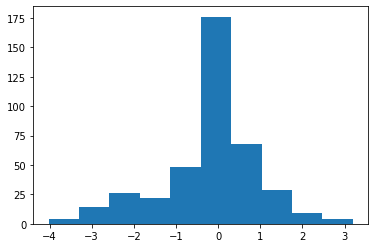

In [29]:
plt.hist(model10.use(XTest)-TTest10)

(array([  2.,  10.,  19.,  21.,  49., 134., 116.,  25.,  13.,  11.]),
 array([-4.44071789, -3.67212669, -2.90353548, -2.13494428, -1.36635307,
        -0.59776187,  0.17082934,  0.93942054,  1.70801174,  2.47660295,
         3.24519415]),
 <BarContainer object of 10 artists>)

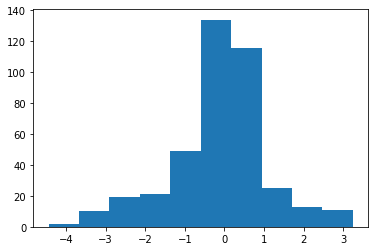

In [30]:
plt.hist(model25.use(XTest)-TTest25)

(array([  7.,  16.,  27.,  35.,  61., 144.,  74.,  11.,  14.,  11.]),
 array([-3.75169635, -3.05564315, -2.35958994, -1.66353674, -0.96748354,
        -0.27143034,  0.42462286,  1.12067606,  1.81672926,  2.51278247,
         3.20883567]),
 <BarContainer object of 10 artists>)

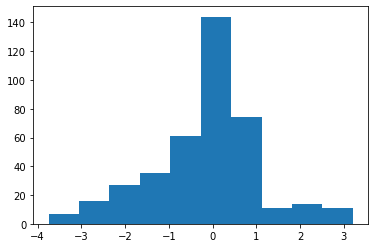

In [31]:
plt.hist(model50.use(XTest)-TTest50)

Text(0, 0.5, 'Actual Magnitude')

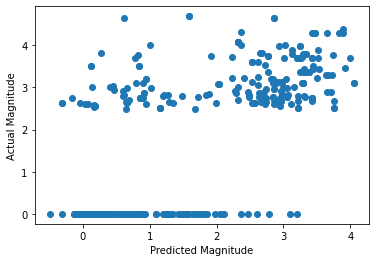

In [32]:
plt.plot(model10.use(XTest), TTest10, 'o')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Actual Magnitude')

Text(0, 0.5, 'Actual Magnitude')

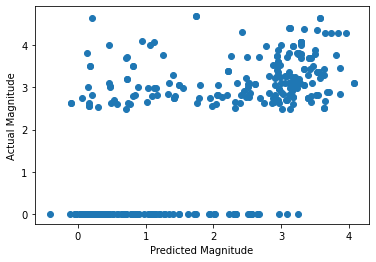

In [33]:
plt.plot(model25.use(XTest), TTest25, 'o')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Actual Magnitude')

Text(0, 0.5, 'Actual Magnitude')

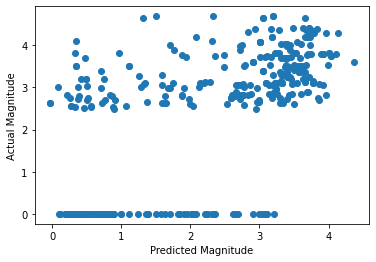

In [34]:
plt.plot(model50.use(XTest), TTest50, 'o')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Actual Magnitude')

In [35]:
print(predictedActualDF(model10.use(XTest), TTest10).sort_values('Actual')[-11:-1])
print(predictedActualDF(model25.use(XTest), TTest25).sort_values('Actual')[-11:-1])
print(predictedActualDF(model50.use(XTest), TTest50).sort_values('Actual')[-11:-1])

     Predicted  Actual
318   3.826643    4.30
55    3.890535    4.30
373   3.473633    4.30
325   3.644497    4.30
248   2.368771    4.32
252   3.888726    4.39
194   0.625081    4.65
287   2.865309    4.65
167   2.865309    4.65
265   1.584927    4.69
     Predicted  Actual
248   2.418064    4.32
172   3.527279    4.36
252   3.340537    4.39
373   3.130909    4.40
192   3.113671    4.40
14    3.130909    4.40
167   3.576497    4.65
194   0.209282    4.65
287   3.576497    4.65
231   1.738707    4.69
     Predicted  Actual
373   3.714401    4.40
303   3.482759    4.40
14    3.714401    4.40
167   3.050784    4.65
194   1.309521    4.65
287   3.050784    4.65
42    3.661650    4.65
231   3.198109    4.69
265   3.198109    4.69
391   2.332009    4.69


In [36]:
print(predictedActualDF(model10.use(XTest) - TTest10, TTest10).sort_values('Actual')[-11:-1])
print(predictedActualDF(model25.use(XTest) - TTest25, TTest25).sort_values('Actual')[-11:-1])
print(predictedActualDF(model50.use(XTest) - TTest50, TTest50).sort_values('Actual')[-11:-1])

     Predicted  Actual
318  -0.473357    4.30
55   -0.409465    4.30
373  -0.826367    4.30
325  -0.655503    4.30
248  -1.951229    4.32
252  -0.501274    4.39
194  -4.024919    4.65
287  -1.784691    4.65
167  -1.784691    4.65
265  -3.105073    4.69
     Predicted  Actual
248  -1.901936    4.32
172  -0.832721    4.36
252  -1.049463    4.39
373  -1.269091    4.40
192  -1.286329    4.40
14   -1.269091    4.40
167  -1.073503    4.65
194  -4.440718    4.65
287  -1.073503    4.65
231  -2.951293    4.69
     Predicted  Actual
373  -0.685599    4.40
303  -0.917241    4.40
14   -0.685599    4.40
167  -1.599216    4.65
194  -3.340479    4.65
287  -1.599216    4.65
42   -0.988350    4.65
231  -1.491891    4.69
265  -1.491891    4.69
391  -2.357991    4.69


In [37]:
from scipy import stats

In [38]:
print(stats.linregress(model10.use(XTest)[:,0], TTest10[:,0]))
print(stats.linregress(model25.use(XTest)[:,0], TTest25[:,0]))
print(stats.linregress(model50.use(XTest)[:,0], TTest50[:,0]))

LinregressResult(slope=0.9021883193117167, intercept=0.29669200659306716, rvalue=0.7188993120751684, pvalue=7.627905518283521e-65, stderr=0.04372640460154307)
LinregressResult(slope=0.8807376449104698, intercept=0.3190091503230694, rvalue=0.7054197918324048, pvalue=1.8118681154501133e-61, stderr=0.044358291939767716)
LinregressResult(slope=0.8557047032361111, intercept=0.4288550424842461, rvalue=0.6850578535945573, pvalue=1.0210651741861e-56, stderr=0.04561187580088535)


R-value of 0.7 indicates moderate to strong correlation. Not great, but it could be worse.

Demonstration of the overfitting problem. Networks that are better able to accomodate the training data are able to perform better on high-magnitude predictions, but guess high magnitudes too often on testing data, leading to a higher RMSE on testing data.

In [55]:
overfittedModel = nn.NeuralNetwork(X.shape[1], [400, 400], T10.shape[1], activation_function='tanh')
overfittedModel.train(X, T50, 4000, 0.005, method='adam')

Adam: Epoch 400 Error=1.01911
Adam: Epoch 800 Error=0.95368
Adam: Epoch 1200 Error=0.86480
Adam: Epoch 1600 Error=0.75749
Adam: Epoch 2000 Error=0.66745
Adam: Epoch 2400 Error=0.61209
Adam: Epoch 2800 Error=0.59079
Adam: Epoch 3200 Error=0.54920
Adam: Epoch 3600 Error=0.53171
Adam: Epoch 4000 Error=0.56985


NeuralNetwork(11, [400, 400], 1, 'tanh')

In [56]:
print("RMSE Test Data: Overfitted model ", rmse(overfittedModel.use(XTest), TTest10))

RMSE Test Data: Overfitted model  1.6107261770618442


Text(0, 0.5, 'Actual Magnitude')

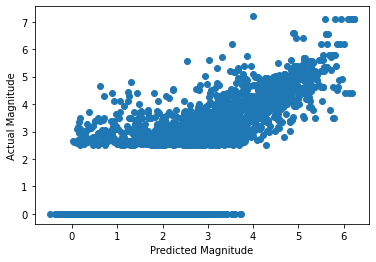

In [57]:
plt.plot(model25.use(X), T10, 'o')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Actual Magnitude')

Text(0, 0.5, 'Actual Magnitude')

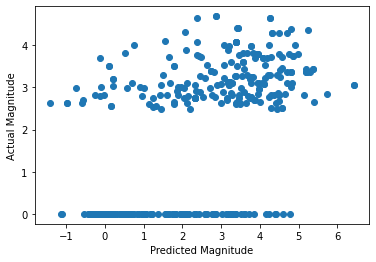

In [58]:
plt.plot(overfittedModel.use(XTest), TTest25, 'o')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Actual Magnitude')

## Code to pull data from USGS website
The below code isn't really relevant to the machine learning portion of the project, but it's cool, and would definitely help if I wanted to continue this project :)

In [39]:
import requests
import datetime
import time
import pandas
import io
import math
import numpy as np

In [40]:
#Makes an API request to USGS data
def makeAPIRequest(date, lat, lon): #date in yyyy-mm-dd format
    dt = datetime.datetime(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    startTime = dt - datetime.timedelta(days=30)
    startTime = f'{startTime.year:04d}'+ '-' + f'{startTime.month:02d}' + '-' + f'{startTime.day:02d}'
    endTime = dt
    #endTime = dt + datetime.timedelta(days=14) #uncomment this for generating training data
    endTime = f'{endTime.year:04d}'+ '-' + f'{endTime.month:02d}' + '-' + f'{endTime.day:02d}'
    
    requestString = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=" + startTime + "&endtime=" + endTime + "&minmagnitude=2.5"
    
    requestString = requestString + "&latitude=" + f'{lat:.2f}' + "&longitude=" + f'{lon:.2f}' + "&maxradiuskm=85&orderby=time"
    response = requests.get(requestString)

    df = pandas.read_csv(io.StringIO(response.content.decode('utf-8')))
    
    data = df[["time", "latitude", "longitude", "depth", "mag"]]
    data = data.reindex(index=data.index[::-1])
    data = data.reset_index(drop=True)
    
    data.insert(1, "Timestamp", np.zeros(data.shape[0]))
    for i in range(0,data.shape[0]):
        dt = datetime.datetime(int(data["time"][i][0:4]), int(data["time"][i][5:7]), int(data["time"][i][8:10]), int(data["time"][i][11:13]), int(data["time"][i][14:16]), int(data["time"][i][17:19]))
        data["Timestamp"][i] = time.mktime(dt.timetuple())  #This causes an annoying warning :/

    return data

In [41]:
#Formats API Request to make data points the neural networks can use
def formatAPIRequest(last30dquakes, lat, lon, timestamp):
    columns = ["Latitude", "Longitude", "10 Mi Quakes", "25 Mi Quakes", "50 Mi Quakes", "Max Mag 10 Mi", "Max Mag 25 Mi", "Max Mag 50 Mi", "Time D 10Mi", "Time D 25Mi", "Time D 50Mi"]
    outputData = pandas.DataFrame(columns = columns)
    
    quakes50Miles = earthquakesWithinXMiles(last30dquakes, lat, lon, 50)
    quakes25Miles = earthquakesWithinXMiles(quakes50Miles, lat, lon, 25)
    quakes10Miles = earthquakesWithinXMiles(quakes25Miles, lat, lon, 10)

    n_quakes10 = quakes10Miles.shape[0]
    n_quakes25 = quakes25Miles.shape[0]
    n_quakes50 = quakes50Miles.shape[0]

    maxMag10 = quakes10Miles["mag"].max()
    maxMag25 = quakes25Miles["mag"].max()
    maxMag50 = quakes50Miles["mag"].max()

    if(quakes10Miles.shape[0] > 0):
        timeD10 = float(timestamp) - float(quakes10Miles["Timestamp"].iloc[quakes10Miles["mag"].argmax()])
    else:
        timeD10 = -1
    
    if(quakes25Miles.shape[0] > 0):
        timeD25 = float(timestamp) - float(quakes25Miles["Timestamp"].iloc[quakes25Miles["mag"].argmax()])
    else:
        timeD25 = -1
    
    if(quakes50Miles.shape[0] > 0):
        timeD50 = float(timestamp) - float(quakes50Miles["Timestamp"].iloc[quakes50Miles["mag"].argmax()])
    else:
        timeD50 = -1

    outputData = outputData.append(pandas.DataFrame([[lat, lon, n_quakes10, n_quakes25, n_quakes50, maxMag10, maxMag25, maxMag50, timeD10, timeD25, timeD50]], columns = columns), ignore_index=True)
    outputData = outputData.fillna(0)
    return outputData

In [42]:
#Essentially just makes a timestamp column and converts to numpy array
def getInputData(date, lat, lon):
    result = makeAPIRequest(date, lat, lon)
    dt = datetime.datetime(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    timestamp = time.mktime(dt.timetuple())
    return formatAPIRequest(result, lat, lon, timestamp)

### Case study
The northridge earthquake occurred on January 17, 1994, north of Los Angeles, with a magnitude of 6.7. This code tests to see if this network can predict the earthquake given the earthquake data for the location from the day before. This earthquake is contained within the training data.

In [48]:
northridgeData = getInputData("1994-01-17", 34.213, -118.537 )
print(northridgeData)
print("10Mi Prediction: ", model10.use(northridgeData)[0][0])
print("25Mi Prediction: ", model25.use(northridgeData)[0][0])
print("50Mi Prediction: ", model50.use(northridgeData)[0][0])
print("Overfit Model Prediction: ", overfittedModel.use(northridgeData)[0][0])

   Latitude  Longitude  10 Mi Quakes  25 Mi Quakes  50 Mi Quakes  \
0    34.213   -118.537             0             5             6   

   Max Mag 10 Mi  Max Mag 25 Mi  Max Mag 50 Mi  Time D 10Mi  Time D 25Mi  \
0            0.0           3.71           3.71           -1     608341.0   

   Time D 50Mi  
0     608341.0  
10Mi Prediction:  2.2754931967640846
25Mi Prediction:  2.7120275075381324
50Mi Prediction:  2.536368184910387
Overfit Model Prediction:  3.4637733106715842


<ipython-input-40-57db22b30b5d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Timestamp"][i] = time.mktime(dt.timetuple())  #This causes an annoying warning :/


Data from the next day

In [49]:
northridgeData = getInputData("1994-01-18", 34.213, -118.537 )
print(northridgeData)
print("10Mi Prediction: ", model10.use(northridgeData)[0][0])
print("25Mi Prediction: ", model25.use(northridgeData)[0][0])
print("50Mi Prediction: ", model50.use(northridgeData)[0][0])
print("Overfit Model Prediction: ", overfittedModel.use(northridgeData)[0][0])

<ipython-input-40-57db22b30b5d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Timestamp"][i] = time.mktime(dt.timetuple())  #This causes an annoying warning :/


   Latitude  Longitude  10 Mi Quakes  25 Mi Quakes  50 Mi Quakes  \
0    34.213   -118.537           161           250           251   

   Max Mag 10 Mi  Max Mag 25 Mi  Max Mag 50 Mi  Time D 10Mi  Time D 25Mi  \
0            6.7            6.7            6.7      41345.0      41345.0   

   Time D 50Mi  
0      41345.0  
10Mi Prediction:  4.879220652830793
25Mi Prediction:  5.104365071414365
50Mi Prediction:  5.093768997037011
Overfit Model Prediction:  5.044324300034834


Predictions increase due to aftershocks

Even the model that was overfitted to the training data was unable to predict this earthquake, even though it is contained within the training data. There is not enough information to know that a large earthquake is on the horizon.